In [8]:
! pip install datasets transformers[sentencepiece]


[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from datasets import load_dataset

# File Produces 404 and getting error message "Please pass `features` or at least one example when writing data"
data_files = "https://the-eye.eu/public/AI/pile_preliminary_components/PUBMED_title_abstracts_2019_baseline.jsonl.zst"
large_dataset = load_dataset("json", data_files=data_files, split="train")
size_gb = large_dataset.dataset_size / (1024 ** 3)
print(f"Dataset size (cache file) : {size_gb:.2f} GB")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset

In [4]:
import psutil

# Process.memory_info is expressed in bytes, so convert to megabytes
print(f"RAM used: {psutil.Process().memory_info().rss / (1024 * 1024):.2f} MB")

RAM used: 149.68 MB


In [5]:
import timeit

code_snippet = """batch_size = 1000

for idx in range(0, len(large_dataset), batch_size):
    _ = large_dataset[idx:idx + batch_size]
"""

time = timeit.timeit(stmt=code_snippet, number=1, globals=globals())
print(
    f"Iterated over {len(large_dataset)} examples (about {size_gb:.1f} GB) in "
    f"{time:.1f}s, i.e. {size_gb/time:.3f} GB/s"
)

NameError: name 'large_dataset' is not defined

In [6]:
large_dataset_streamed = load_dataset(
    "json", data_files=data_files, split="train", streaming=True)

next(iter(large_dataset_streamed))

StopIteration: 

In [7]:
type(large_dataset_streamed)

datasets.iterable_dataset.IterableDataset

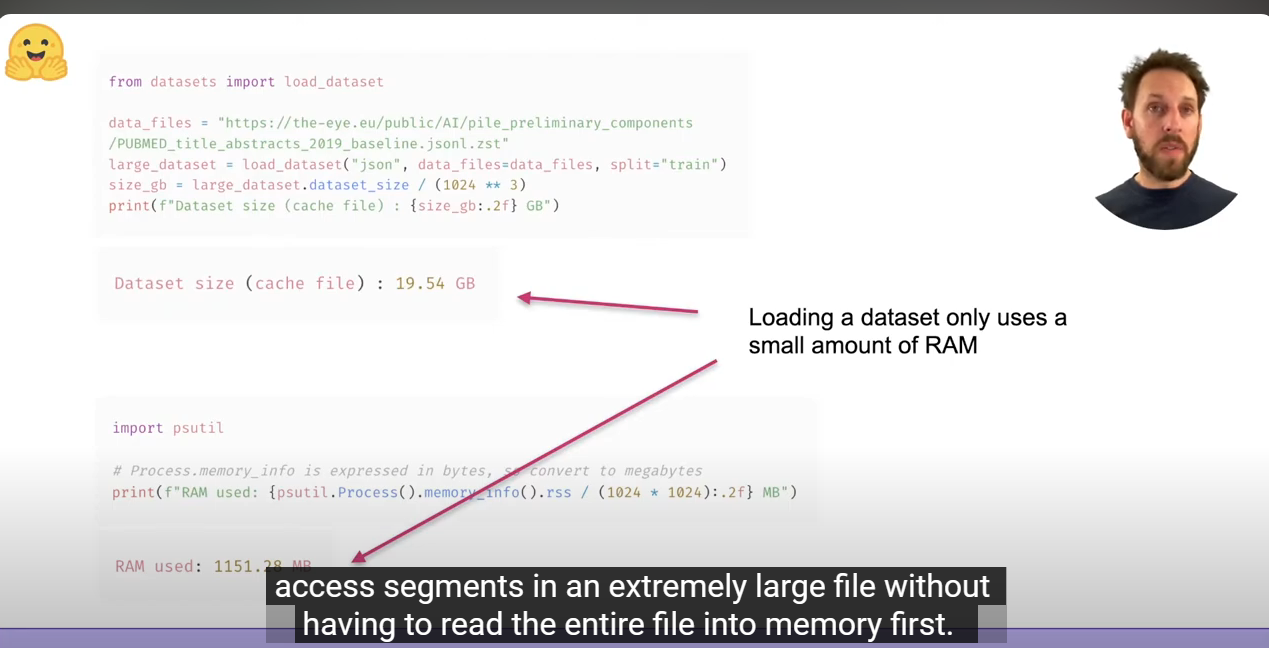

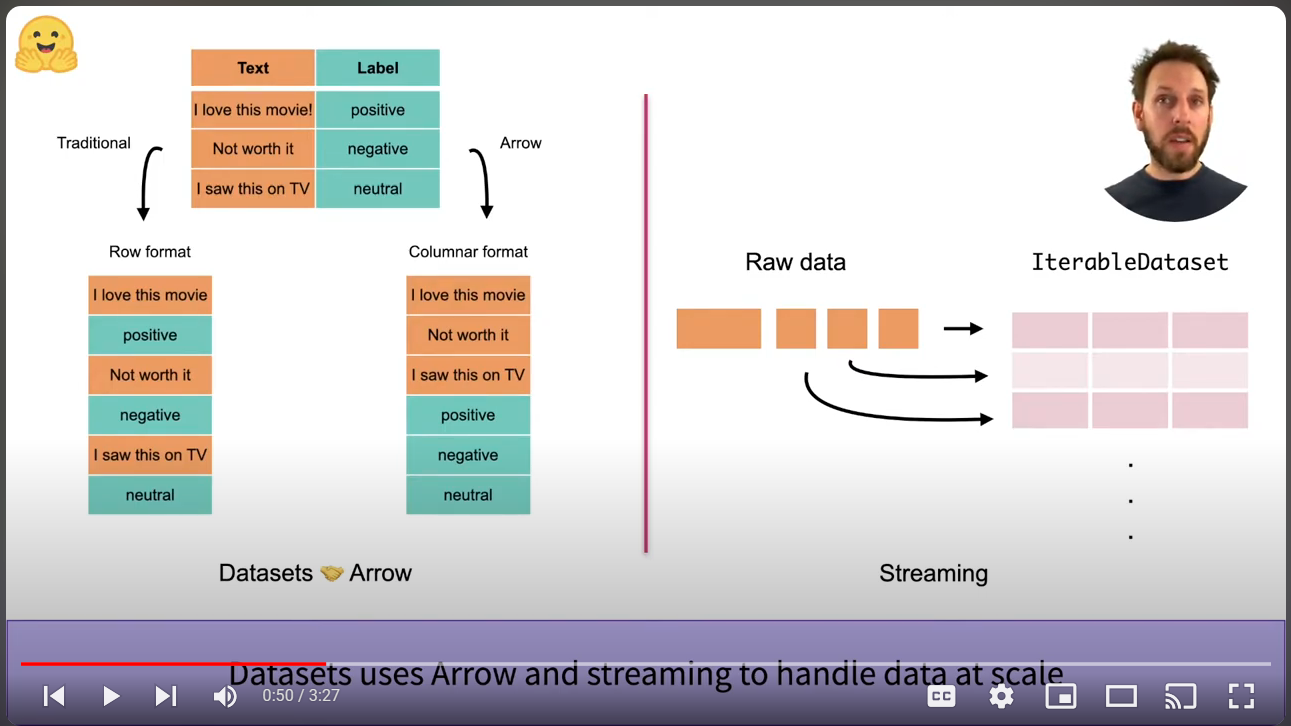

# Important notes

- Allows loading large datasets without overloading computing resources
- Done through apache arrow format to handle data at scale
- IterableDataset allows you to go through dataset piece by piece without having to download it first
- Tokenization can be used alongside IterableDataset